In [262]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from tqdm import tqdm


import matplotlib.pyplot as plt
%matplotlib inline

# load the dataset

In [263]:
dataset_name = "grp9dataset.csv"

df = pd.read_csv(dataset_name)
drops = ["Sation", "Period", "From Date", "To Date"]

# for i in df.columns[df.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
#     df[i].fillna(df[i].mean(),inplace=True)

df = df.drop(drops, axis='columns')[df.SO2 != '-']
df = df.fillna(0)
df.head()



,Latitude,Longitude,PM2.5,PM10,NO2,NOx,CO,O3,SO2
0,28.815329,77.153010,196.86,309.67,45.31,25.11,1.28,63.48,4.43
1,28.647622,77.315809,208.43,372.22,78.68,103.99,2.21,34.15,16.18
2,28.695381,77.181665,208.21,349.79,68.91,55.66,2.09,5.18,19.42
4,28.776200,77.051074,254.93,406.77,35.94,23.56,1.94,64.71,10.27
7,28.656756,77.227234,0.00,307.87,81.61,78.99,2.57,26.28,17.52


In [264]:
def seperate_dataset(data, target):
  X = data[['Latitude', 'Longitude']]
  y = data[target].values

  # print(X.head())
  # print(y)

  return X, y

datasets = {}

for target in df.columns[2:]:
  X, y = seperate_dataset(df, target)
  test_size = 0.2

  # Splitting code here
  xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size)
  datasets[target] = (xtrain, xtest, ytrain, ytest)

print(datasets)


{'PM2.5': (     Latitude  Longitude
7   28.656756  77.227234
28  28.623763  77.287209
25  28.578340  77.184000
29  28.674045  77.131023
10  28.571027  77.071901
4   28.776200  77.051074
36  28.710508  77.249485
15  28.580280  77.233829
30  28.639652  77.146275
38  28.672342  77.315260
33  28.732528  77.119920
22  28.570173  76.933762
37  28.531346  77.190156
32  28.563262  77.186937
24  28.567890  77.250515
39  28.699793  77.165453
8   28.750050  77.111261
27  28.530785  77.271255
0   28.815329  77.153010
35  28.550425  77.215938
13  28.628624  77.241060
16  28.588333  77.221667
12  28.681174  77.302523
1   28.647622  77.315809
2   28.695381  77.181665
14  28.732820  77.170633,      Latitude  Longitude
34  28.651478  77.147311
18  28.611281  77.237738
23  28.822836  77.101981
21  28.609090  77.032541
20  28.684678  77.076574
19  28.636110  77.173332
9   28.498571  77.264840, array([  0.  , 194.71,   0.  , 200.5 , 186.71, 254.93, 176.52, 151.33,
       154.54, 220.25, 223.67, 179.  ,  9

In [269]:
# Train
def get_model():
  model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    # ('scaler', StandardScaler()),
    # ('model', ElasticNet(alpha=0.3, l1_ratio=0.5))
    ('model', LinearRegression())
  ])

  return model

gases = list(datasets.keys())
models = {}

for i in tqdm(range(len(gases))):
  target = gases[i]
  # print(target)

  xtrain, xtest, ytrain, ytest = datasets[target]
  model = get_model()
  model.fit(xtrain, ytrain)

  models[target] = model



for gase, model in models.items():
  print(gase)

  cvs = cross_val_score(model, xtrain, ytrain, cv=5, scoring="r2").mean()
  train_score = model.score(xtrain, ytrain)
  test_score = model.score(xtest, ytest)

  print("CVS:", cvs)
  print("Train score:", train_score)
  print("Test score:", test_score)


# sample_x = [[35.9856, -117.3794]]
# print(model.predict(sample_x))

# print("Cross validation score:", cvs)


100%|██████████| 7/7 [00:00<00:00, 34.75it/s]


PM2.5
CVS: -2.015153609723316
Train score: -690.5156901972797
Test score: -189.32114447837648
PM10
CVS: -2.015153609723316
Train score: -2412.2023453890984
Test score: -706.4657870810997
NO2
CVS: -2.015153609723316
Train score: -41.37988458747195
Test score: -10.65353521748948
NOx
CVS: -2.015153609723316
Train score: -51.39029730256908
Test score: -9.359242924871277
CO
CVS: -2.015153609723316
Train score: -2.8926425874261543
Test score: -2.367934339722091
O3
CVS: -2.015153609723316
Train score: -36.133606706143816
Test score: -5.527941510885793
SO2
CVS: -2.015153609723316
Train score: 0.10219076084758805
Test score: -0.3694484495326662


TypeError: 'value' must be an instance of str or bytes, not a int

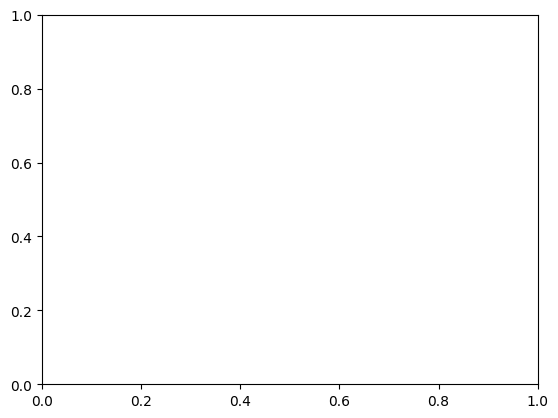

In [266]:
# def plot_model(model):
#   xscatter = xtest.male
#   yscatter = ytest

#   # xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
#   ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2) #Plot data
#   sns.lineplot(x=xline,y=yline_label) # Plot line indicating label
#   # sns.lineplot(x=xline,y=yline_prob) # Plot line indicating probability

ax = sns.scatterplot(x=xtrain.Latitude,y=ytrain,alpha=0.2) #Plot data
sns.lineplot(x=xtest.Latitude,y=model.predict(xtest), color='red')

# Testing

In [28]:
# # Calculate performance measures from scratch
# # TP: true postives
# # TN: true negatives
# # FP: False positives
# # FN: False negatives
# def compute_performance(yhat, y, classes):
#     # First, get tp, tn, fp, fn
#     tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
#     tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
#     fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
#     fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

#     print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")

#     # Accuracy
#     acc = (tp + tn) / (tp + tn + fp + fn)

#     # Precision
#     # "Of the ones I labeled +, how many are actually +?"
#     precision = tp / (tp + fp)

#     # Recall
#     # "Of all the + in the data, how many do I correctly label?"
#     recall = tp / (tp + fn)

#     # Sensitivity
#     # "Of all the + in the data, how many do I correctly label?"
#     sensitivity = recall

#     # Specificity
#     # "Of all the - in the data, how many do I correctly label?"
#     specificity = tn / (fp + tn)

#     # Print results

#     print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
#           "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))